In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams



In [29]:
pwd


'c:\\Users\\Hari Prathap\\Desktop\\Team Member 2'

## 1. Download the dataset: Dataset
## 2. Load the dataset into the tool.


In [30]:
df = pd.read_csv("abalone.csv")

In [31]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 3. Perform Below Visualizations.
## ∙ Univariate Analysis
## ∙ Bi-Variate Analysis
## ∙ Multi-Variate Analysis

In [32]:
#rename output variable
df.rename(columns={"Sex":"sex", "Length":"length", "Diameter":"diameter",
                   "Height":"height", "Whole weight":"whole_weight",
                   "Shucked weight":"shucked_weight", "Viscera weight":"viscera_weight",
                   "Shell weight":"shell_weight", "Rings":"rings"}, inplace = True)

In [33]:
df[df['height'] == 0]  #need to drop these rows.
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

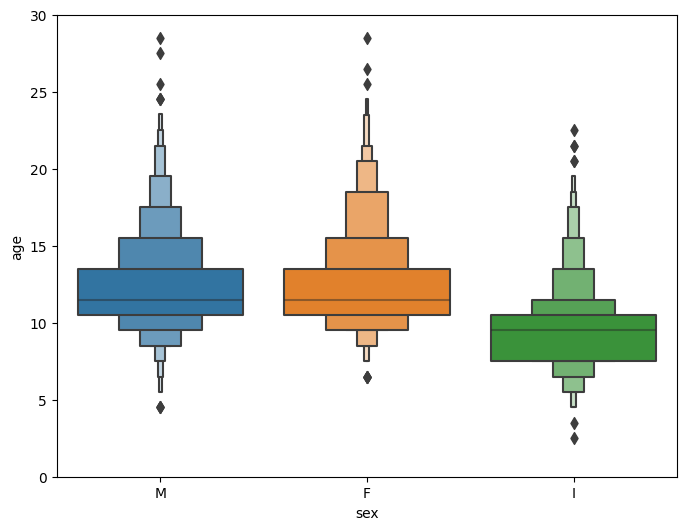

In [34]:
df['age'] = df['rings']+1.5 #AS per the problem statement
df.drop('rings', axis = 1, inplace = True)
df.head()
#categorical features
temp = pd.concat([df['age'], df['sex']], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='sex', y="age", data=df)
fig.axis(ymin=0, ymax=30);

**ANALYSIS**
- There is no difference in age of rings for male and female (8-19). But in infants, it lies between (5-10)

**Histograms: Understanding the Distribution of the Numerical Features**

array([[<AxesSubplot: title={'center': 'length'}>,
        <AxesSubplot: title={'center': 'diameter'}>,
        <AxesSubplot: title={'center': 'height'}>,
        <AxesSubplot: title={'center': 'whole_weight'}>],
       [<AxesSubplot: title={'center': 'shucked_weight'}>,
        <AxesSubplot: title={'center': 'viscera_weight'}>,
        <AxesSubplot: title={'center': 'shell_weight'}>,
        <AxesSubplot: title={'center': 'age'}>]], dtype=object)

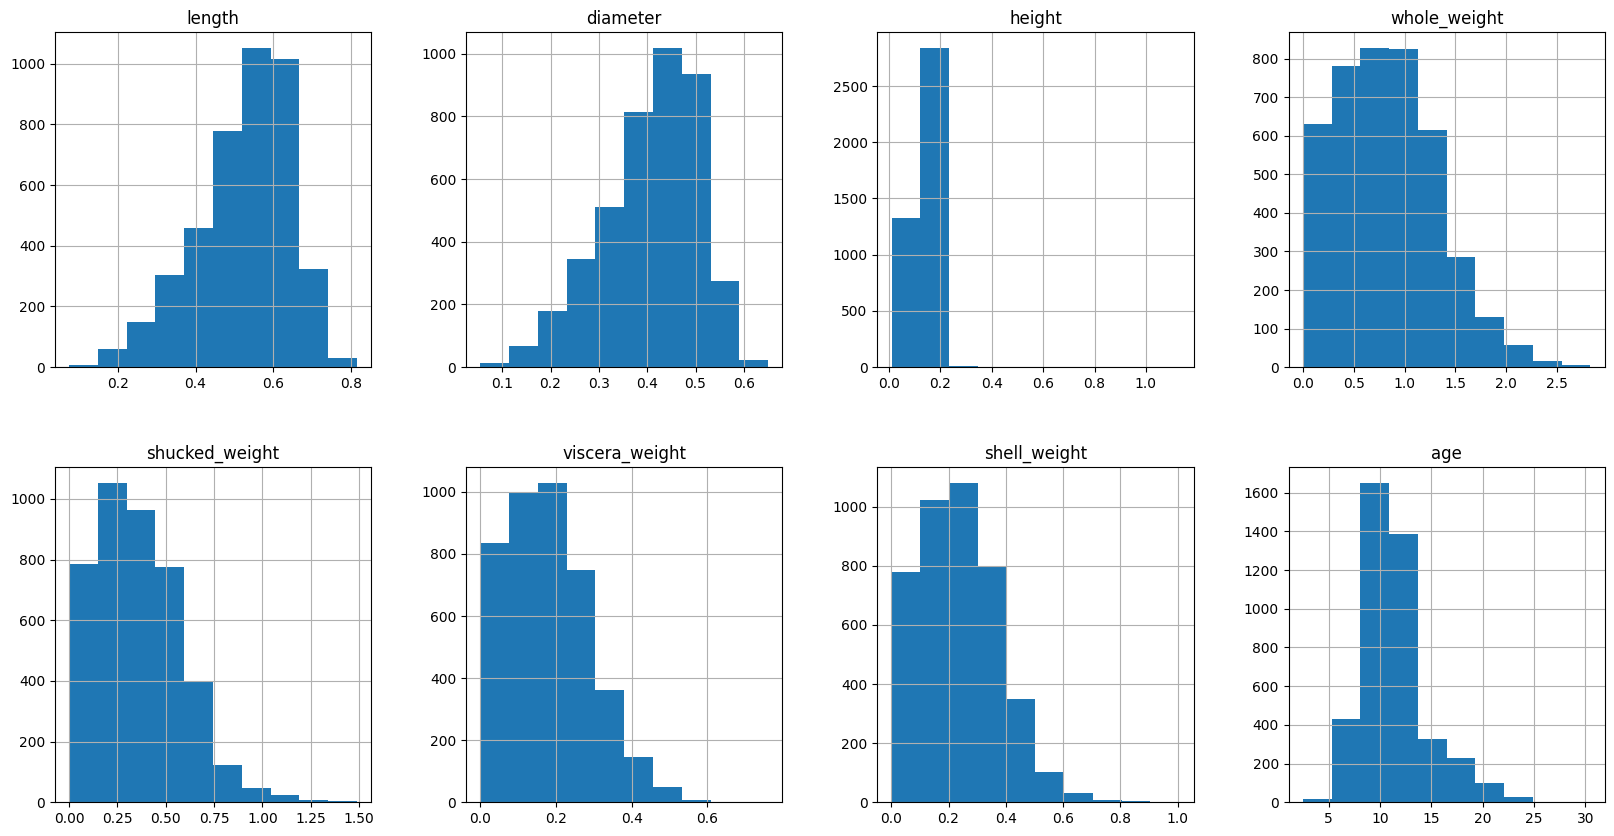

In [35]:
df.hist(figsize = (20,10), layout = (2,4))

**ANALYSIS**
- Skewness of the height is too high. (need to normalise later...)
- Need to check skewness for all varibles

**Skewness of the Variables**

In [36]:
df.skew().sort_values(ascending = False)

C:\Users\Hari Prathap\AppData\Local\Temp\ipykernel_8916\1630139964.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending = False)


height            3.166364
age               1.113754
shucked_weight    0.718735
shell_weight      0.621081
viscera_weight    0.591455
whole_weight      0.530549
diameter         -0.610182
length           -0.640993
dtype: float64

**Coorelation Plot**

C:\Users\Hari Prathap\AppData\Local\Temp\ipykernel_8916\2228473816.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


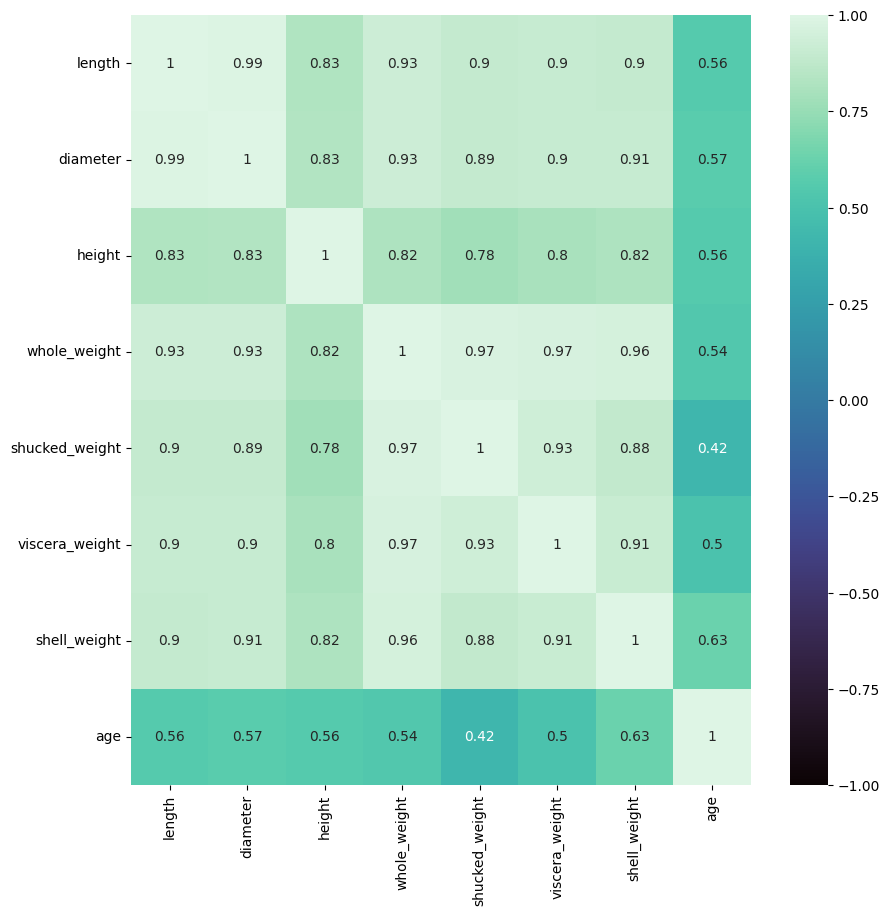

In [37]:
corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

In [38]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['diameter', 'shucked_weight', 'viscera_weight', 'shell_weight']


C:\Users\Hari Prathap\AppData\Local\Temp\ipykernel_8916\975313807.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


**ANALYSIS**
- We will remove the above columns, before proceeding any further.

## 4. Perform descriptive statistics on the dataset.


In [39]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [40]:
df.shape

(4175, 9)

In [41]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,11.435090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,9.500000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,12.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4175 non-null   object 
 1   length          4175 non-null   float64
 2   diameter        4175 non-null   float64
 3   height          4175 non-null   float64
 4   whole_weight    4175 non-null   float64
 5   shucked_weight  4175 non-null   float64
 6   viscera_weight  4175 non-null   float64
 7   shell_weight    4175 non-null   float64
 8   age             4175 non-null   float64
dtypes: float64(8), object(1)
memory usage: 326.2+ KB


## 5. Check for Missing values and deal with them.


In [43]:
df[df.duplicated()]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age


In [44]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
age               0
dtype: int64

### there is no missing values and duplicates in dataframe


## 6. Find the outliers and replace them outliers


In [45]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

## After removing outliers, boxplot will be like

In [46]:
import matplotlib.pyplot as mtp

In [47]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

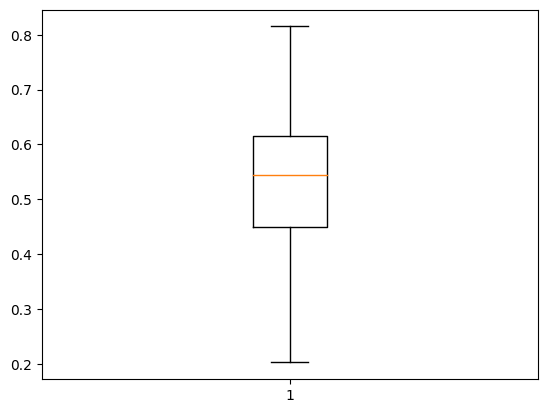

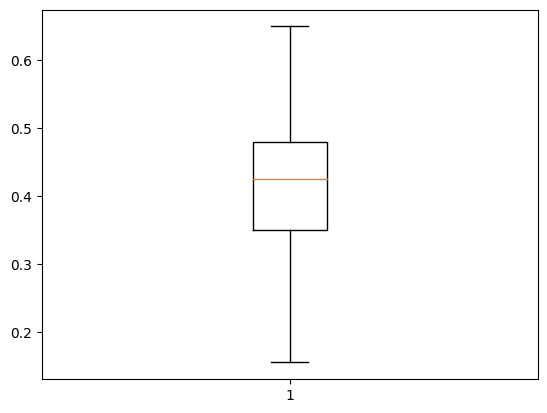

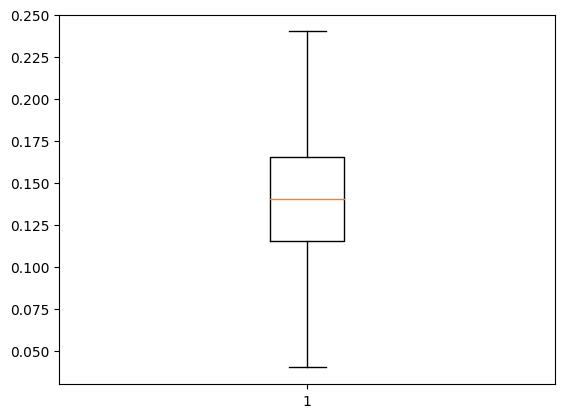

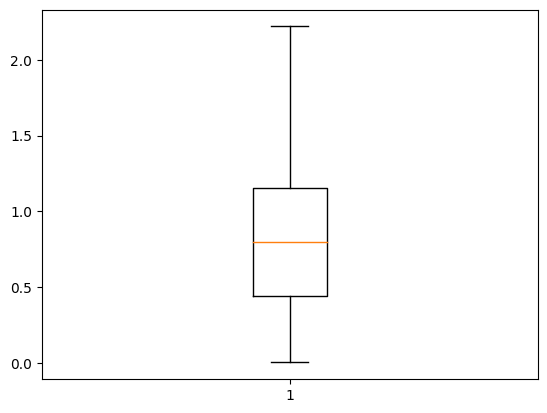

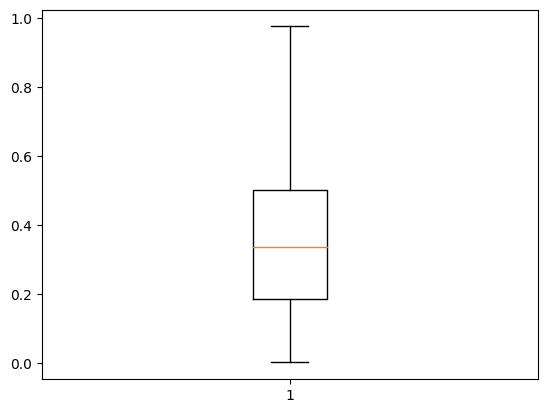

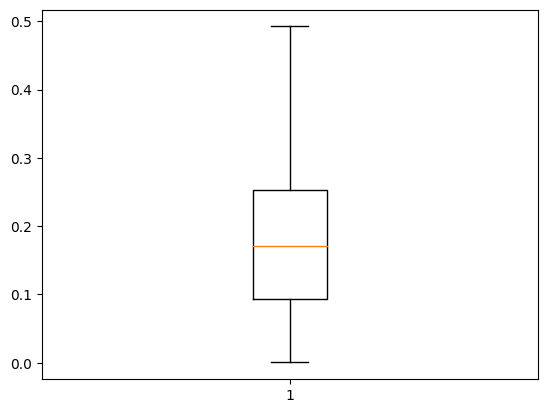

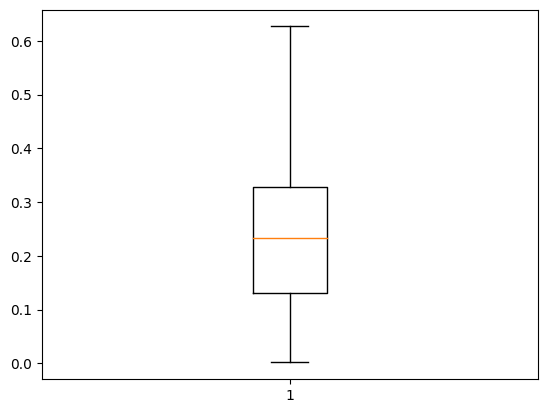

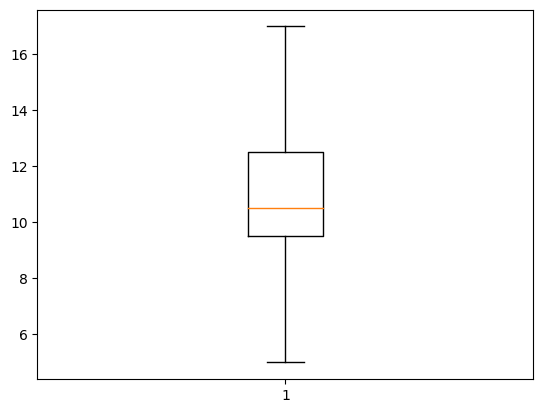

In [48]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        mtp.boxplot(df[i])
        mtp.show()

## 7. Check for Categorical columns and perform encoding.

In [49]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])

In [51]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## 8. Split the data into dependent and independent variables.

In [52]:
x=df.iloc[:,:-1]
x.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [53]:
y=df.iloc[:,-1]
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: age, dtype: float64

## 9. Scale the independent variable

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

## 10. Split the data into training and testing

In [ ]:
x_train,x_test,y_train,y_test=StandardScaler(x,y,test_size=0.33)

In [ ]:
x_train.shape

(2797, 8)

In [ ]:
x_test.shape

(1378, 8)

## 11. Build the Model


In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()


## 12. Train the Model

In [ ]:
reg.fit(x_train,y_train)


RandomForestRegressor()

## 13. Test the Model

In [ ]:
y_pred=reg.predict(x_test)

## 14. Measure the performance using Metrics.

In [ ]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,y_pred)))

1.8081309009200963
